In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [12]:
# Load the Titanic dataset
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_data = pd.read_csv(url)

# Display the first few rows of the dataset
titanic_data.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
# Check for missing values
titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [14]:
# Data cleaning
titanic_data['Age'].fillna(titanic_data['Age'].median(), inplace=True)
titanic_data.drop(columns=['Cabin'], inplace=True)
titanic_data['Embarked'].fillna(titanic_data['Embarked'].mode()[0], inplace=True)
titanic_data['Sex'] = titanic_data['Sex'].astype('category')
titanic_data['Embarked'] = titanic_data['Embarked'].astype('category')
titanic_data['Pclass'] = titanic_data['Pclass'].astype('category')



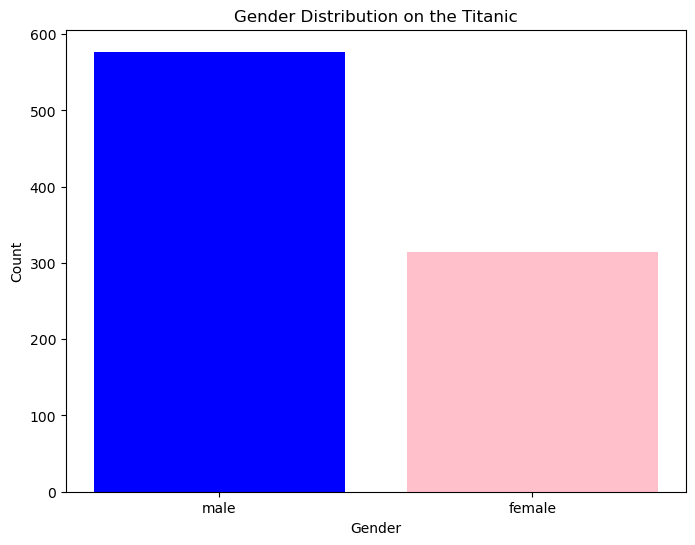

In [15]:
# Gender distribution
gender_counts = titanic_data['Sex'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(gender_counts.index, gender_counts.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution on the Titanic')
plt.show()



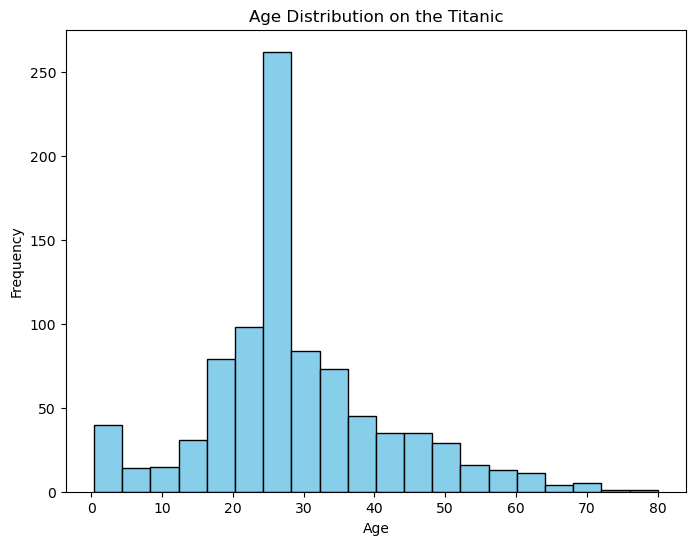

In [16]:
# Age distribution
plt.figure(figsize=(8, 6))
plt.hist(titanic_data['Age'], bins=20, edgecolor='black', color='skyblue')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution on the Titanic')
plt.show()



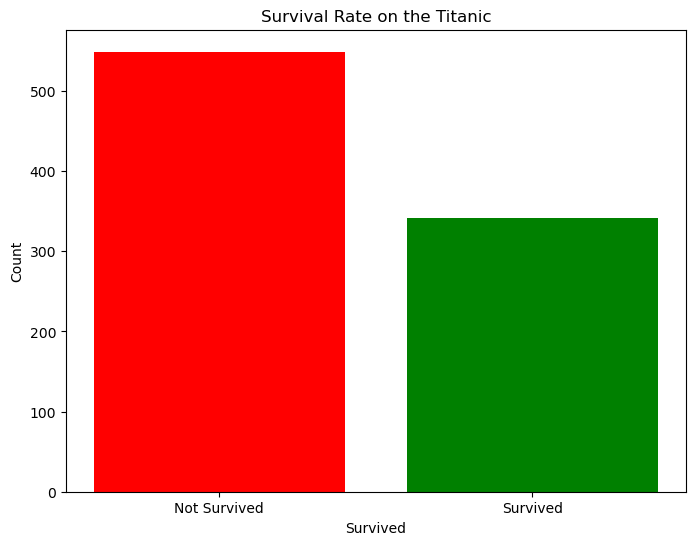

In [17]:
# Survival rate
survival_counts = titanic_data['Survived'].value_counts()
plt.figure(figsize=(8, 6))
plt.bar(survival_counts.index, survival_counts.values, color=['red', 'green'])
plt.xlabel('Survived')
plt.ylabel('Count')
plt.title('Survival Rate on the Titanic')
plt.xticks([0, 1], ['Not Survived', 'Survived'])
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_13876\4113841549.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_survival = titanic_data.groupby('Sex')['Survived'].mean()


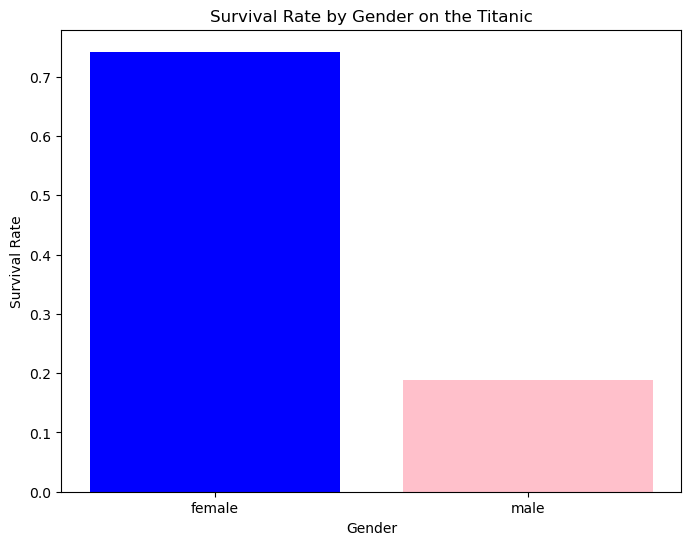

In [18]:
# Survival rate by gender
gender_survival = titanic_data.groupby('Sex')['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.bar(gender_survival.index, gender_survival.values, color=['blue', 'pink'])
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender on the Titanic')
plt.show()



C:\Users\user\AppData\Local\Temp\ipykernel_13876\3051246798.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  class_survival = titanic_data.groupby('Pclass')['Survived'].mean()


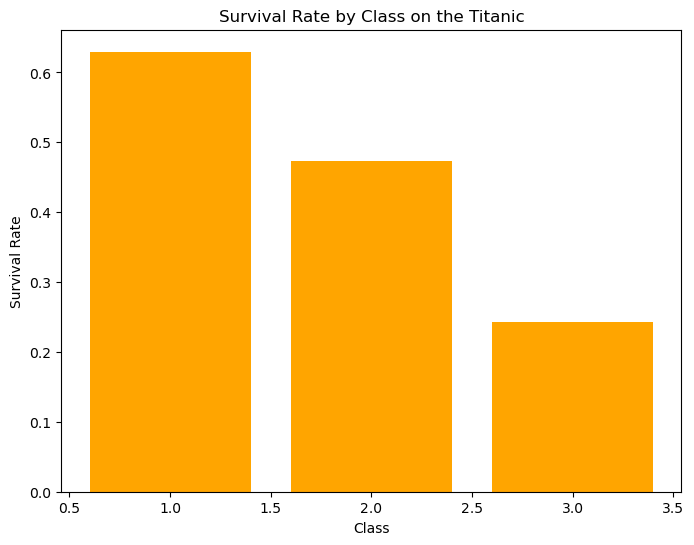

In [19]:
# Survival rate by class
class_survival = titanic_data.groupby('Pclass')['Survived'].mean()
plt.figure(figsize=(8, 6))
plt.bar(class_survival.index, class_survival.values, color='orange')
plt.xlabel('Class')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Class on the Titanic')
plt.show()



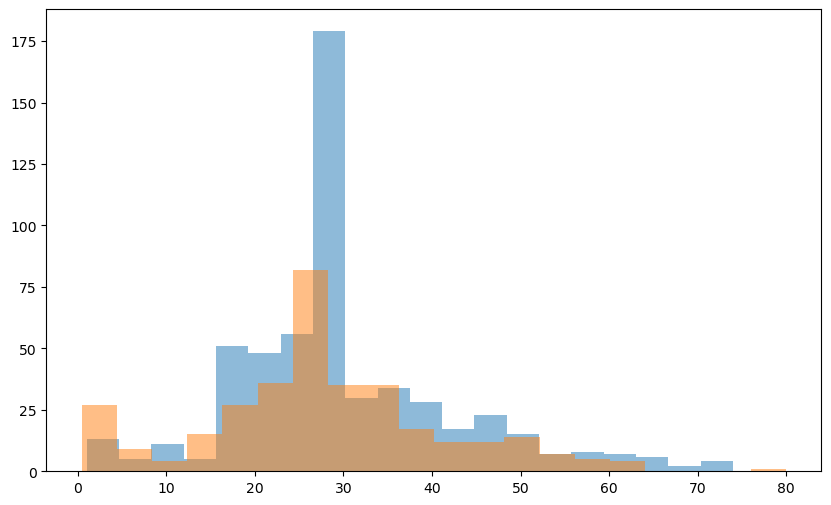

In [20]:
# Age distribution by survival status
plt.figure(figsize=(10, 6))
for status in [0, 1]:
    subset = titanic_data[titanic_data['Survived'] == status]
    plt.hist(subset['Age'], bins=20, alpha=0.5, label=f'Survived: {status}')



C:\Users\user\AppData\Local\Temp\ipykernel_13876\1043639368.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  gender_class_survival = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()


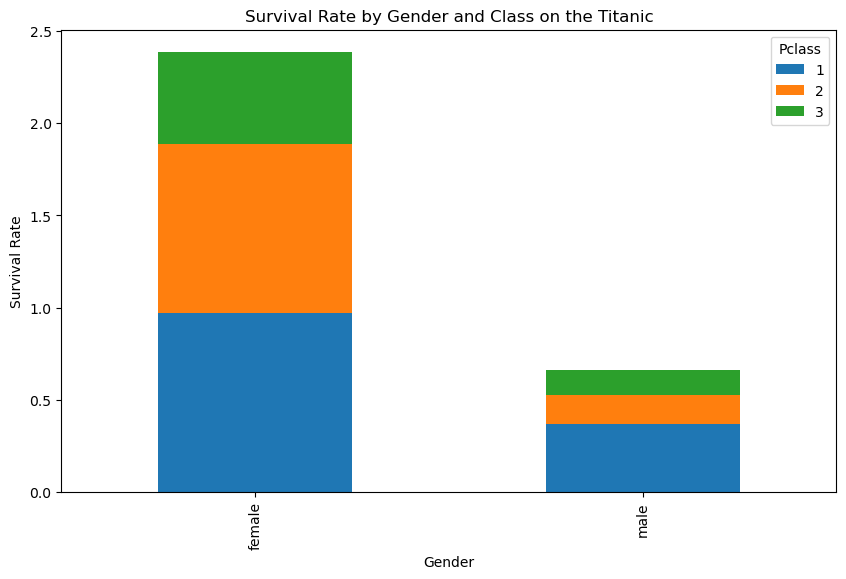

In [22]:
# Survival rate by gender and class
gender_class_survival = titanic_data.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
gender_class_survival.plot(kind='bar', figsize=(10, 6), stacked=True)
plt.xlabel('Gender')
plt.ylabel('Survival Rate')
plt.title('Survival Rate by Gender and Class on the Titanic')
plt.show()